In [28]:
# numpy, scipy, pandasのインポート
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
# 機械学習ライブラリ
import sklearn
# 小数第3位まで表示
%precision 3

'%.3f'

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
# 必要なライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# 乳がんのデータを読み込み
cancer = load_breast_cancer()
# 決定木クラスの初期化
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# k分割交差検証の実行
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)
# 結果の表示
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:.3f}'.format(scores.mean(), scores.std()))

AttributeError: 'DecisionTreeClassifier' object has no attribute 'head'

ベストスコア:0.91
その時のパラメータ(gamma, C):(0.001, 1.0)


<AxesSubplot:>

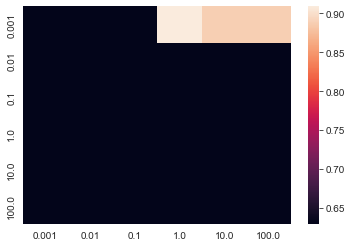

In [31]:
# インポート
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# 乳がんのデータを読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
    cancer.target,
    stratify = cancer.target,
    random_state=0)
# ハイパーパラメータのすべての組み合わせでモデルを構築・検証
scores = {}
for gamma in np.logspace(-3, 2, num=6):
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train,y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)
# 検証結果をscoresに格納
scores = pd.Series(scores)
# 表示
print('ベストスコア:{:.2f}'.format(scores.max()))
print('その時のパラメータ(gamma, C):{}'.format(scores.idxmax()))
# ヒートマップを表示。縦軸にgamma、横軸にCを表示
sns.heatmap(scores.unstack())

In [32]:
# インポート
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# 乳がんのデータを読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=0)
# GridSearchCVクラスに与えるパラメータを準備
param_grid = { 'C': np. logspace(-3, 2, num=6), 'gamma': np. logspace(-3, 2, num=6)}
# GridSearchCVクラスの初期化
gs = GridSearchCV(estimator=SVC(), param_grid = param_grid, cv=5)
# ハイパーパラメータの組み合わせの検証とベストモデルの構築
gs.fit(X_train,y_train)
# 表示
print('Best cross validation score:{:.3f}'.format(gs.best_score_))
print('Best parameters:{}'.format(gs.best_params_))
print('Test score:{:.3f}'.format(gs.score(X_test,y_test)))

Best cross validation score:0.925
Best parameters:{'C': 1.0, 'gamma': 0.001}
Test score:0.909


In [33]:
# インポート
from sklearn.svm import SVC
# 乳がんのデータを読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer. data, cancer. target,
stratify = cancer.target, random_state=66)
# クラスの初期化と学習
model = SVC(gamma=0.001,C=1)
model.fit(X_train,y_train)
# 表示
print('{} train score: {:.3f}'.format(model.__class__.__name__, model.score(X_train,y_train)))
print('{} test score: {:.3f}'.format(model.__class__.__name__ , model.score(X_test,y_test)))

SVC train score: 0.979
SVC test score: 0.909


In [34]:
# インポート
from sklearn.metrics import confusion_matrix
# テストデータを使って予測値を算出
y_pred = model.predict(X_test)
m = confusion_matrix(y_test, y_pred)
print('Confution matrix:¥n{}'.format(m))

Confution matrix:¥n[[48  5]
 [ 8 82]]


In [35]:
#正解率の計算
accuracy = (m[0, 0] + m[1, 1]) / m.sum()
# 適合率の計算
precision = (m[1,1])/m[:, 1].sum()
# 再現率の計算
recall = (m[1,1])/m[1, :].sum()
# F1スコアの計算
f1 = 2 * (precision * recall)/(precision + recall)
print('正解率:{:.3f}'.format(accuracy))
print('適合率:{:.3f}'.format(precision))
print('再現率:{:.3f}'.format(recall))
print('F1値:{:.3f}'.format(f1))

正解率:0.909
適合率:0.943
再現率:0.911
F1値:0.927


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('正解率:{:.3f}'.format(accuracy_score(y_test, y_pred)))
print('適合率:{:.3f}'.format(precision_score(y_test, y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test, y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test, y_pred)))

正解率:0.909
適合率:0.943
再現率:0.911
F1値:0.927


In [37]:
# インポート，ロジスティック回帰モデル
from sklearn.linear_model import LogisticRegression
# 乳がんのデータを読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
cancer.target,
stratify = cancer.target,
random_state=66)
# LogisticRegressionクラスの初期化と学習
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
# テスト用データの予測確率を計算
results = pd.DataFrame(model.predict_proba(X_test), columns=cancer.target_names)
# 先頭の5行を表示
results.head()

,malignant,benign
0,0.004743,0.995257
1,0.000507,0.999493
2,0.044118,0.955882
3,0.007633,0.992367
4,0.003431,0.996569


In [38]:
# 良性（benign）クラスの予測確率が0.4、0.3、0.15、0.05以上なら、それぞれの列に1を設定する
for threshold in [0.4, 0.3, 0.15, 0.05]:
    results[f'flag_{threshold}'] = results['benign'].map(lambda x: 1 if x > threshold else 0)
# 先頭の10行を表示
results.head(10)

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.004743,0.995257,1,1,1,1
1,0.000507,0.999493,1,1,1,1
2,0.044118,0.955882,1,1,1,1
3,0.007633,0.992367,1,1,1,1
4,0.003431,0.996569,1,1,1,1
5,0.006973,0.993027,1,1,1,1
6,0.008903,0.991097,1,1,1,1
7,0.003289,0.996711,1,1,1,1
8,0.858607,0.141393,0,0,0,1
9,0.839939,0.160061,0,0,1,1


<AxesSubplot:xlabel='false positive rate', ylabel='true positive rate'>

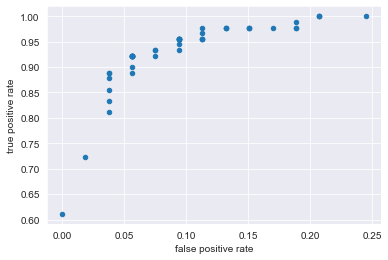

In [39]:
# 閾値を0.01から0.99の間で50通りとして、偽陽性率と真陽性率を計算
rates = {}
for threshold in np.linspace(0.01, 0.99, num=50):
    labels = results['benign'].map(lambda x: 1 if x > threshold else 0)
    m = confusion_matrix(y_test, labels)
    rates[threshold] = {'false positive rate': m[0,1] / m[0, :].sum(),'true positive rate': m[1,1] / m[1, :].sum()}
# 横軸をfalse positive rate、縦軸をtrue positive rateとしてプロット
pd.DataFrame(rates).T.plot.scatter('false positive rate', 'true positive rate')

In [40]:
# インポート
from sklearn import svm
from sklearn.metrics import roc_curve, auc
# 乳がんのデータを読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, test_size=0.5, random_state=66)
# SVCによる予測確率の取得
model = svm.SVC(kernel='linear', probability=True, random_state=0)
model.fit(X_train, y_train)
# 予測確率を取得
y_pred = model.predict_proba(X_test)[:,1]

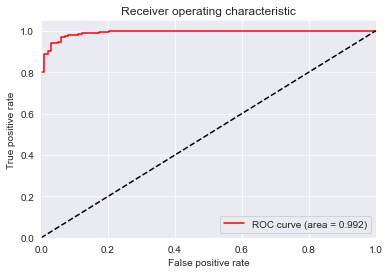

In [41]:
# 偽陽性率と真陽性率の算出
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# AUCの算出
auc = auc(fpr, tpr)
# ROC曲線の描画
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %.3f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")

In [42]:
# インポート
from sklearn.datasets import load_boston
# Housingデータセットを読み込み
boston = load_boston()
# DataFrameにデータを格納
X = pd.DataFrame(boston.data, columns=boston.feature_names)
# 住宅価格の中央値（MEDV）のデータを用意
y = pd.Series(boston.target, name='MEDV')
# Xとyを結合して先頭の5行を表示
X.join(y).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
# インポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error,r2_score
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [44]:
# モデルの設定
models = {
'LinearRegression': LinearRegression(),
'Ridge': Ridge(random_state=0),
'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
'LinearSVR': LinearSVR(random_state=0)
}
# 評価値の計算
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'MSE')] = mean_squared_error(y_test, model.predict(X_test))
    scores[(model_name, 'MAE')] = mean_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'MedAE')] = median_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'R2')] = r2_score(y_test, model.predict(X_test))
#表示
pd.Series(scores).unstack()

,MAE,MSE,MedAE,R2
DecisionTreeRegressor,3.064822,24.590435,1.900000,0.675653
LinearRegression,3.627793,25.301662,2.903830,0.666272
LinearSVR,3.275385,26.799616,2.092362,0.646514
Ridge,3.618201,25.282890,2.930524,0.666520


In [45]:
# インポート
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# 乳がんのデータを読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state=66)
# k-NNモデルとそのバギングの設定
models = {
'kNN': KNeighborsClassifier(),
'bagging': BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=0)
}
# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
# 結果を表示
pd.Series(scores).unstack()

,test_score,train_score
bagging,0.937063,0.950704
kNN,0.923077,0.948357


In [46]:
# インポート
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
# housingデータを読み込み
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
boston.data, boston.target, random_state=66)
# 決定木とAdaBoostRegressorのパラメータ設定
models = {
'tree': DecisionTreeRegressor(random_state=0),
'AdaBoost': AdaBoostRegressor(DecisionTreeRegressor(), random_state=0)
}
# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
# 結果を表示
pd.Series(scores).unstack()

,test_score,train_score
AdaBoost,0.922829,0.999522
tree,0.721430,1.000000


In [47]:
# インポート
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Housingデータを読み込み
boston = load_boston()
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
boston.data, boston.target, random_state=66)
# ランダムフォレストと勾配ブースティングのパラメータ設定
models = {
'RandomForest': RandomForestRegressor(random_state=0),
'GradientBoost': GradientBoostingRegressor(random_state=0)
}
# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
# 結果を表示
pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.926076,0.977138
RandomForest,0.894637,0.979374


<AxesSubplot:>

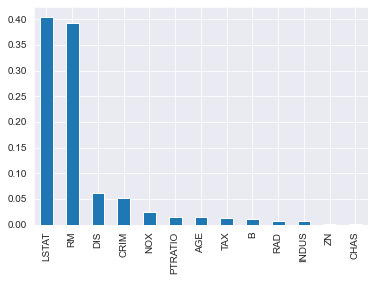

In [48]:
# feature_importmnces属性を取得
s = pd.Series(models['RandomForest'].feature_importances_,
index=boston.feature_names)
# 取得した値を降順に表示
s.sort_values(ascending=False).plot.bar(color='C0')